In [18]:
from pathlib import Path 
from collections import defaultdict
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [19]:
data = pd.read_csv('brba.csv')
data.head()

,First Characters Name,Second Characters Name,Season,Episode
0,Walter White,Jesse Pinkman,Season 1,Episode 1
1,Walter White,Skyler White,Season 1,Episode 1
2,Walter White,Walt JR,Season 1,Episode 1
3,Skyler White,Walt JR,Season 1,Episode 1
4,Walter White,Walt JR,Season 1,Episode 1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   First Characters Name   1719 non-null   object
 1   Second Characters Name  1719 non-null   object
 2   Season                  1719 non-null   object
 3   Episode                 1719 non-null   object
dtypes: object(4)
memory usage: 53.8+ KB


In [21]:
G = nx.Graph()

In [22]:
likovi = pd.unique(data[['First Characters Name', 'Second Characters Name']].values.ravel())
likovi

array(['Walter White', 'Jesse Pinkman', 'Skyler White', 'Walt JR',
       'Bogdan', 'Marie Schrader', 'Hank Schrader', 'Steven Gomez',
       'Doctor #1', 'Emilio Koyama', 'Krazy 8', 'Student #1',
       'Backhoe operator', 'Student #2', 'Gretchen Schwartz', 'Wendy',
       'Combo', 'Skinny Pete', 'Ken', 'Diane Pinkman', 'Adam Pinkman',
       'Jake Pinkman', 'Dr Delcavoli', 'Badger', 'Elliott Schwartz',
       'Hugo Archilleya', 'Carmen Molina', 'Tuco Salamanca', 'No-Doze',
       'Gonzo', 'Tim Roberts', 'Hector Salamanca', 'Austin Ramsey',
       'George Merket', 'Psychiatrist', 'Paul Tyree', 'Clovis',
       'Jane Margolis', 'Spooge', "Spooge's Wife", "Spooge's Son",
       'Student #3', 'Ted Beneke', 'Vanco', 'Tortuga', 'Getz',
       'Saul Goodman', 'Donald Margolis', 'Tweaky Dude', 'Rival Dealers',
       'Tomas Cantillo', 'Gustavo Fring', 'Victor', 'Holly White',
       'Mike Ehrmantraut', 'Marco Salamanca', 'Leonel Salamanca',
       'Pamela Orbic', 'Group Leader', 'Policeman #

In [23]:
G.add_nodes_from(likovi)


In [25]:
for _, row in data.iterrows():
    c1 = row['First Characters Name']
    c2 = row['Second Characters Name']
    
    if G.has_edge(c1, c2):
        G[c1][c2]['weight'] += 1
    else:
        G.add_edge(c1, c2, weight=1)

print("Cvorovi:", G.nodes())
print("Grane sa tezinama:", G.edges(data=True))
print("Broj cvorova: ", G.number_of_nodes())
print("Broj grana: ", G.number_of_edges())

Cvorovi: ['Walter White', 'Jesse Pinkman', 'Skyler White', 'Walt JR', 'Bogdan', 'Marie Schrader', 'Hank Schrader', 'Steven Gomez', 'Doctor #1', 'Emilio Koyama', 'Krazy 8', 'Student #1', 'Backhoe operator', 'Student #2', 'Gretchen Schwartz', 'Wendy', 'Combo', 'Skinny Pete', 'Ken', 'Diane Pinkman', 'Adam Pinkman', 'Jake Pinkman', 'Dr Delcavoli', 'Badger', 'Elliott Schwartz', 'Hugo Archilleya', 'Carmen Molina', 'Tuco Salamanca', 'No-Doze', 'Gonzo', 'Tim Roberts', 'Hector Salamanca', 'Austin Ramsey', 'George Merket', 'Psychiatrist', 'Paul Tyree', 'Clovis', 'Jane Margolis', 'Spooge', "Spooge's Wife", "Spooge's Son", 'Student #3', 'Ted Beneke', 'Vanco', 'Tortuga', 'Getz', 'Saul Goodman', 'Donald Margolis', 'Tweaky Dude', 'Rival Dealers', 'Tomas Cantillo', 'Gustavo Fring', 'Victor', 'Holly White', 'Mike Ehrmantraut', 'Marco Salamanca', 'Leonel Salamanca', 'Pamela Orbic', 'Group Leader', 'Policeman #1', 'Kailey Erhmantraut', 'Juan Bolsa', 'Policeman #2', 'Louis Corbett', 'Cara', "Combo's Mothe

In [41]:
broj_pojavljivanja = {}
for lik in G.nodes():
    count = (data['First Characters Name'] == lik).sum() + (data['Second Characters Name'] == lik).sum()
    broj_pojavljivanja[lik] = count

node_sizes = [broj_pojavljivanja[lik] + 10 for lik in G.nodes()]
node_colors = [broj_pojavljivanja[lik] for lik in G.nodes()]


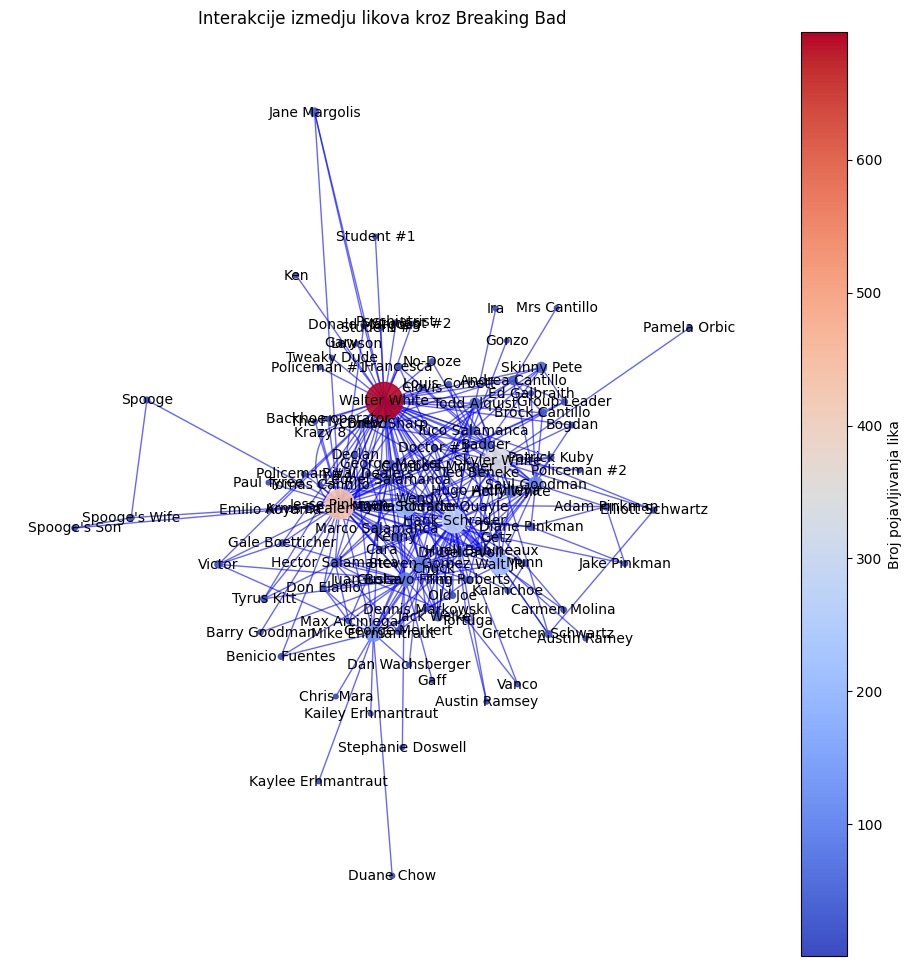

In [45]:
plt.figure(figsize=(12,12))
ax = plt.gca()
pos = nx.kamada_kawai_layout(G, weight='weight')

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.6, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Broj pojavljivanja lika")

plt.title("Interakcije izmedju likova kroz Breaking Bad")

plt.axis('off')
plt.show()